In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
data = load_iris()
X = StandardScaler().fit_transform(data["data"])
feature_names = data["feature_names"]
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

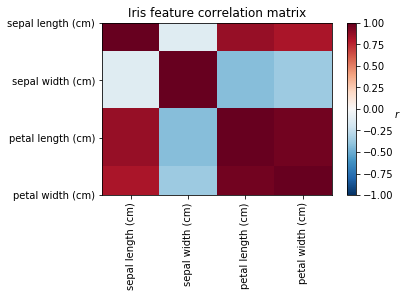

In [3]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()

In [4]:
fa = FactorAnalysis(n_components=2, random_state=0)
model = fa.fit(X)
components = fa.components_.T
X.shape

(150, 4)

In [5]:
#Loadings of the factor analysis
print(components)

[[ 0.88096009 -0.4472869 ]
 [-0.41691605 -0.55390036]
 [ 0.99918858  0.01915283]
 [ 0.96228895  0.05840206]]


In [6]:
fa.get_precision()

array([[  6.22490854,  -1.90105621,  -7.10891579,   0.9045612 ],
       [ -1.90105621,   1.81442836,   2.33664304,   0.09925473],
       [ -7.10891579,   2.33664304,  21.77242927, -14.10489831],
       [  0.9045612 ,   0.09925473, -14.10489831,  13.87758878]])

In [7]:
fa.get_params(deep=True)

{'copy': True,
 'iterated_power': 3,
 'max_iter': 1000,
 'n_components': 2,
 'noise_variance_init': None,
 'random_state': 0,
 'rotation': None,
 'svd_method': 'randomized',
 'tol': 0.01}

In [8]:
#loglikelihoood score
fa.score(X)

-3.342469886818573

In [9]:
#Loadings of the PCA analysis
model.components_

array([[ 0.88096009, -0.41691605,  0.99918858,  0.96228895],
       [-0.4472869 , -0.55390036,  0.01915283,  0.05840206]])

In [10]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [11]:
fa = FactorAnalyzer(2, rotation=None)
fa.fit(X)

FactorAnalyzer(n_factors=2, rotation=None, rotation_kwargs={})

In [12]:
fa.get_eigenvalues()

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([ 2.84243329,  0.88505993,  0.00853874, -0.01435222]))



 PCA :

[[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]


 Unrotated FA :

[[ 0.88096009 -0.4472869 ]
 [-0.41691605 -0.55390036]
 [ 0.99918858  0.01915283]
 [ 0.96228895  0.05840206]]


 Varimax FA :

[[ 0.98633022 -0.05752333]
 [-0.16052385 -0.67443065]
 [ 0.90809432  0.41726413]
 [ 0.85857475  0.43847489]]


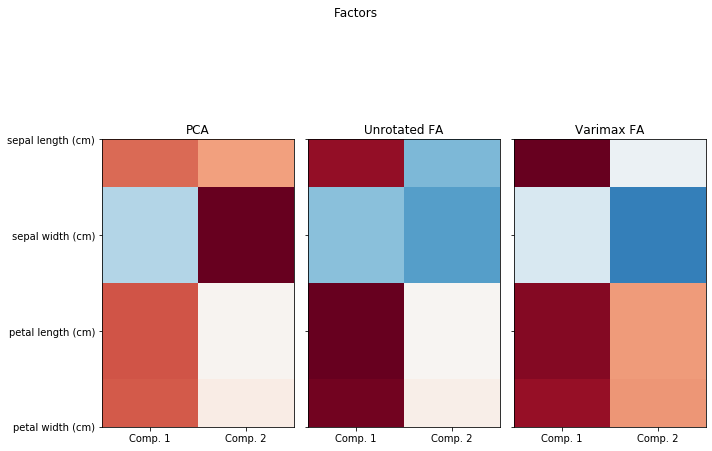

In [13]:
n_comps = 2

methods = [('PCA', PCA()),
           ('Unrotated FA', FactorAnalysis()),
           ('Varimax FA', FactorAnalysis(rotation='varimax'))]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()